<a href="https://colab.research.google.com/github/Tywashburn22/Machine-Learning/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data

In [3]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

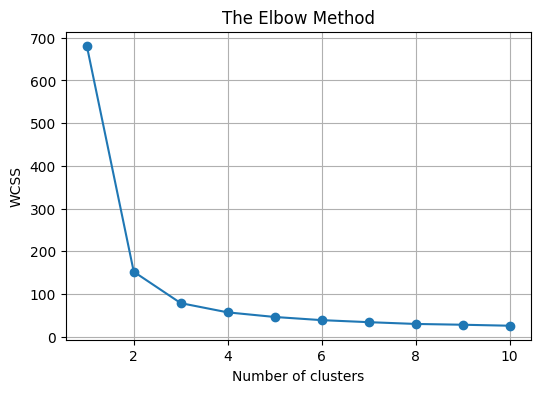

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()

# MNIST Dataset

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

In [6]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
l = LogisticRegression(solver='lbfgs', max_iter=1000)

In [10]:
start_without = time.time()
l.fit(X_train_scaled, y_train)
end_without = time.time()

In [11]:
y_without = l.predict(X_test_scaled)
accuracy_without = accuracy_score(y_test, y_without)

In [12]:
time_without = end_without - start_without

In [13]:
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [14]:
l_pca = LogisticRegression(solver='lbfgs', max_iter=1000)

In [15]:
start_with = time.time()
l_pca.fit(X_train_pca, y_train)
end_with = time.time()

In [16]:
y_with = l_pca.predict(X_test_pca)
accuracy_with = accuracy_score(y_test, y_with)

In [17]:
time_with = end_with - start_with

In [18]:
print(f"Time without PCA: {time_without:.4f} seconds")
print(f"Accuracy without PCA: {accuracy_without:.4f}")

Time without PCA: 34.2881 seconds
Accuracy without PCA: 0.9164


In [19]:
print(f"Time with PCA: {time_with:.4f} seconds")
print(f"Accuracy with PCA: {accuracy_with:.4f}")

Time with PCA: 27.3970 seconds
Accuracy with PCA: 0.9216
